In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path = "data/BH_phase-diagrams-and-loss/data_rike/"

In [3]:
x = np.load(path + "x.npy")
y = np.load(path + "y.npy")
es = np.load(path + "es.npy")
dd = np.load(path + "dd.npy")
cost0 = np.load(path + "cost_bh_L12_trash2_d48_v5_seed17.npy")
cost1 = np.load(path + "cost_bh_L12_trash4_d25_v47_seed16.npy")
cost2 = np.load(path + "cost_bh_L12_trash6_d10_v10_seed22.npy")

In [4]:
vs = np.logspace(-2,2,50)
ds = np.linspace(-0.95,0.95,50)

In [5]:
cbar = np.zeros((2,2), dtype="object")

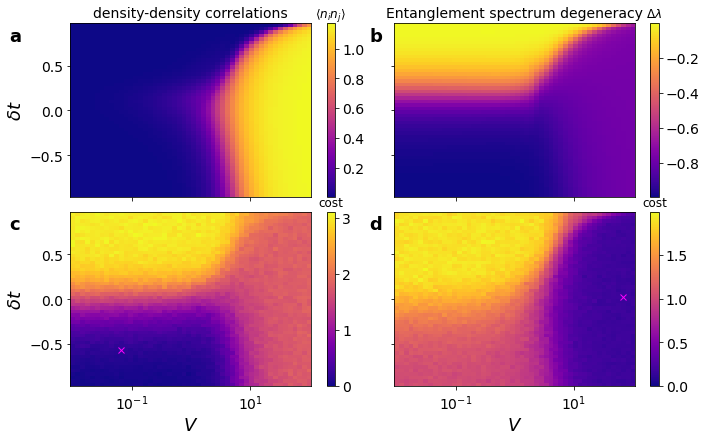

In [6]:
fig,axs = plt.subplots(ncols=2, nrows=2,figsize=(10,6),sharex=True, sharey=True)
cmap = plt.get_cmap("plasma") #'viridis'
cbar_labelsize = 14
cbar = np.zeros((2,2), dtype="object")

ax = axs[0,0]
im = ax.pcolormesh(x,y,dd.T, cmap=cmap, shading="auto",rasterized=True) #,rasterized=True necessary for pdf export
ax.set_xscale("log")
cbar[0,0] = fig.colorbar(im, ax=ax)
cbar[0,0].ax.tick_params(labelsize=cbar_labelsize)



ax = axs[0,1]
im = ax.pcolormesh(x,y,es.T, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar[0,1] = fig.colorbar(im, ax=ax)
cbar[0,1].ax.tick_params(labelsize=cbar_labelsize)



ax = axs[1,0]
im = ax.pcolormesh(x,y,cost2.T,vmin=0, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar[1,0] = fig.colorbar(im, ax=ax)
cbar[1,0].ax.tick_params(labelsize=cbar_labelsize)
ax.plot(vs[10],ds[10],"x", color="magenta")

ax = axs[1,1]
im = ax.pcolormesh(x,y,cost1.T,vmin=0, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar[1,1] = fig.colorbar(im, ax=ax)
cbar[1,1].ax.tick_params(labelsize=cbar_labelsize)
ax.plot(vs[47],ds[25],"x", color="magenta")


for ax in axs.flatten():
    ax.tick_params(labelsize=14)
axs[1,0].set_xlabel(r"$V$",fontsize=18)
axs[1,1].set_xlabel(r"$V$",fontsize=18)
axs[0,0].set_ylabel(r"$\delta t$",fontsize=18)
axs[1,0].set_ylabel(r"$\delta t$",fontsize=18)
plt.tight_layout()

# has to happen after tight_layout()
axs[0,0].text(-0.25,0.9,"a", fontweight="bold", size=18, transform = axs[0,0].transAxes)
axs[1,0].text(-0.25,0.9,"c", fontweight="bold", size=18, transform = axs[1,0].transAxes)
axs[0,1].text(-0.1,0.9,"b", fontweight="bold", size=18, transform = axs[0,1].transAxes)
axs[1,1].text(-0.1,0.9,"d", fontweight="bold", size=18, transform = axs[1,1].transAxes)


cbar[0,0].ax.set_title("$\\langle n_i n_j \\rangle$")
axs[0,0].set_title("density-density correlations", fontsize=14)

cbar[0,1].ax.set_title("$\Delta \\lambda$")
axs[0,1].set_title("Entanglement spectrum degeneracy", fontsize=14)

cbar[1,0].ax.set_title("cost")
cbar[1,1].ax.set_title("cost")

plt.savefig("plots/BH_replot.pdf", bbox_inches='tight')

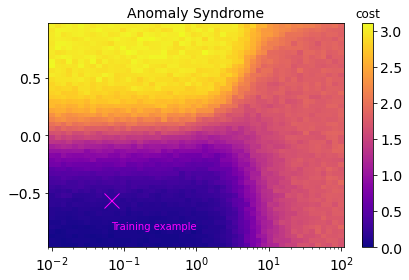

In [20]:
fig, ax = plt.subplots(figsize=(6,4))
im = ax.pcolormesh(x,y,cost2.T,vmin=0, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=cbar_labelsize)
ax.set_title("Anomaly Syndrome", fontsize=14)
cbar.ax.set_title("cost")
ax.plot(vs[10],ds[10],"x", markersize=15, color="magenta")
ax.text(vs[10],ds[10]-0.25,"Training example", color="magenta")
ax.tick_params(labelsize=14)
#ax.set_xlabel(r"$V$",fontsize=18)
#ax.set_ylabel(r"$\delta t$",fontsize=18)
plt.tight_layout()
plt.savefig("plots/BH_ex_for_presentation.png", dpi=500, bbox_inches='tight')

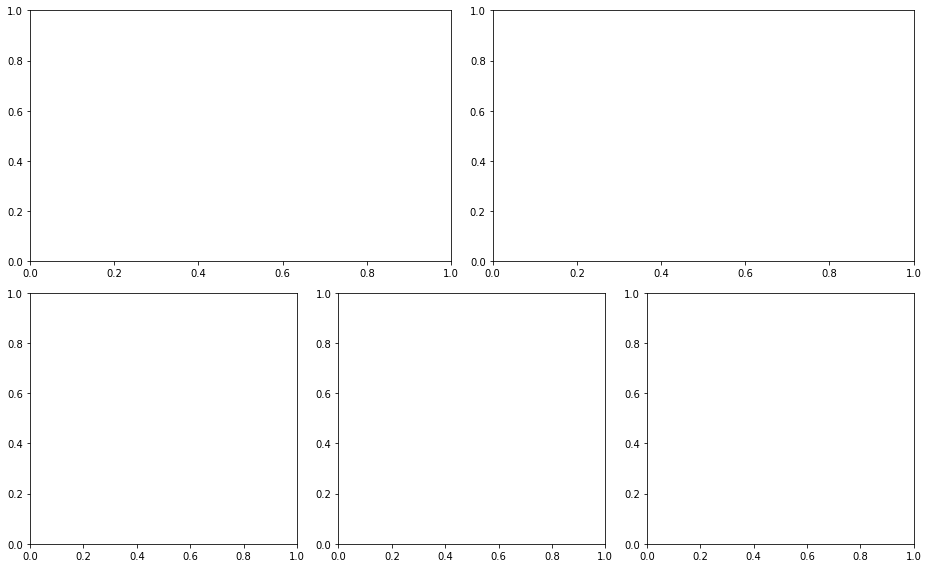

In [38]:
fig = plt.subplots(figsize=(13,8),sharey="row")
ax11 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), rowspan=1, colspan=3)
ax12 = plt.subplot2grid((2, 6), (0, 3), rowspan=1, colspan=3)
ax21 = plt.subplot2grid((2, 6), (1, 0), rowspan=1, colspan=2)
ax22 = plt.subplot2grid((2, 6), (1, 2), rowspan=1, colspan=2)
ax23 = plt.subplot2grid((2, 6), (1, 4), rowspan=1, colspan=2)

plt.tight_layout()